In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
from manuscript_plot_functions import get_emisMasked, get_ElevEmisMasked, get_scatter_plot3
from manuscript_plot_functions import get_ts, get_vertint, get_var, get_scatter_plot2

0.6656851447076679 -0.4461480265186046
-0.04595000525228832
Mean: 0.26155402072367456
0.011497140642978687
Mean: 0.26155402072367456


/tmp/ipykernel_510919/3137214083.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1M').mean()
/tmp/ipykernel_510919/3137214083.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1Y').mean()
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:254: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:254: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)


2.015405210611374 -1.2963960341853173
-0.11100065374078127
Mean: 1.1320195065148413
0.06854409706650721
Mean: 1.1320195065148413


/tmp/ipykernel_510919/3137214083.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1M').mean()
/tmp/ipykernel_510919/3137214083.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1Y').mean()
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:254: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:254: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)


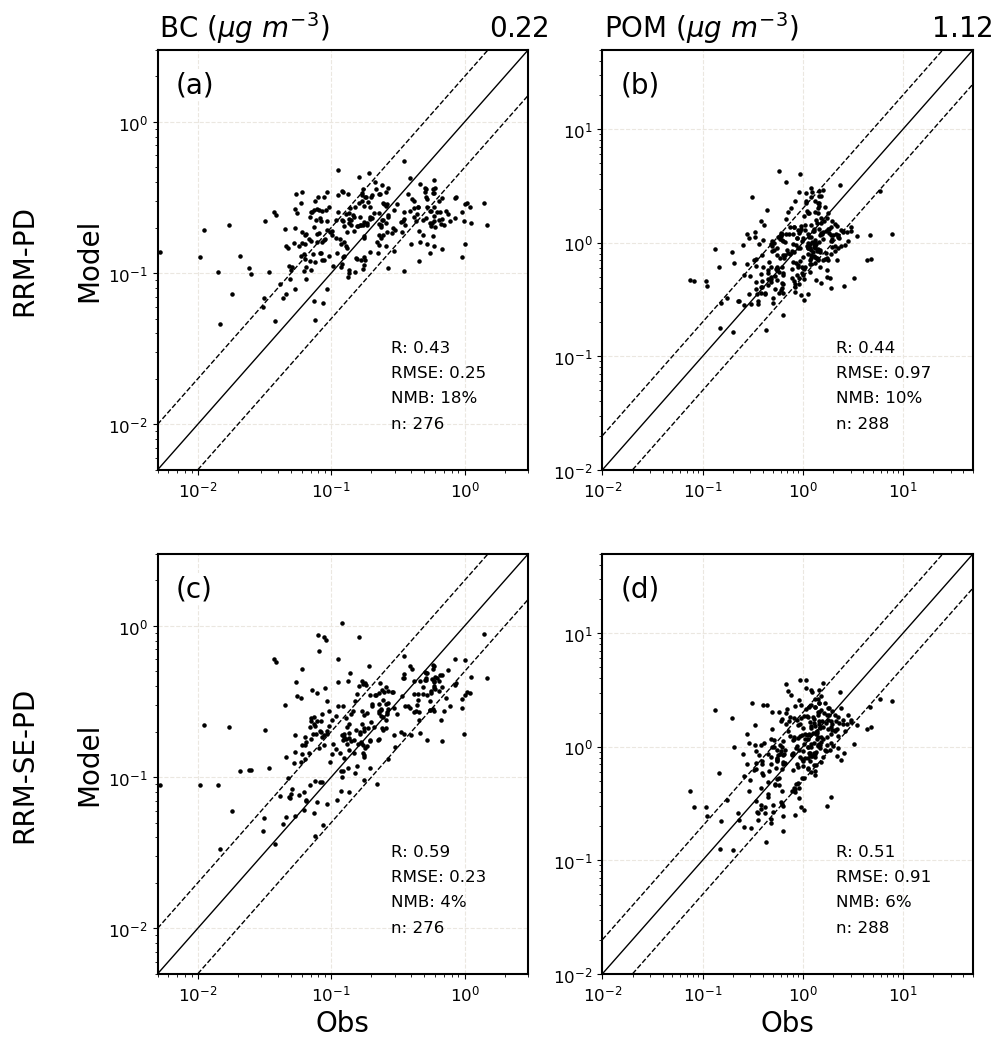

In [13]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
from manuscript_plot_functions import get_emisMasked, get_ElevEmisMasked, get_scatter_plot3
from manuscript_plot_functions import get_ts, get_vertint, get_var, get_scatter_plot2

## All available sites with emission mask
lab=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
lab=['(a)','(b)','(c)','(d)']
obs='obs'
varbs = ['bc_a1_SRF','SE_bc_a1_SRF','bc_a4_SRF','SE_bc_a4_SRF','bc','SE_bc']
df = pd.read_csv('/global/cfs/cdirs/e3sm/www/hass877/share/Data_manuscript/BC_IMPROVE_dailydata.csv')
variable='BC'
df.index=pd.to_datetime(df['time'])
## Get rid of nans & -ve vals
df_nona = df[df['obs'].notna()]
df_nona = df_nona[df_nona['obs']>0]
res='RRM'
df_nona=get_emisMasked(df_nona,res,stat='diff',factor=0.68)
df_monthly = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1M').mean()
df_annual = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1Y').mean()
## Plotting
plt.figure(figsize=(22,12))
i=1
j=1
for v,treat,ylab,xlab in zip(varbs[-2:],['BC ($\u03BCg\ m^{-3}$)                  0.22',''],['RRM-PD\n\nModel','RRM-SE-PD\n\nModel'],['','Obs']):
    ax=plt.subplot(2,4,i)
    get_scatter_plot2(df_monthly,v,res,ax,treatment=treat,temp='monthly',size=5,cax=[5e-3,5e-3,3e0,3e0],vv=ylab,vx=xlab,typ=obs)
    ax.text(0.05,0.95,lab[j-1],size=20,transform=ax.transAxes,va='top',bbox={'facecolor':'white','pad':1,'edgecolor':'none'})
    i+=4
    j+=2
## All available sites with emission mask
varbs = ['pom_a1_SRF','SE_pom_a1_SRF','pom_a4_SRF','SE_pom_a4_SRF','pom','SE_pom']
df = pd.read_csv('/global/cfs/cdirs/e3sm/www/hass877/share/Data_manuscript/POM_IMPROVE_dailydata.csv')
variable='POM'
df.index=pd.to_datetime(df['time'])
## Get rid of nans & -ve vals
df_nona = df[df['obs'].notna()]
df_nona = df_nona[df_nona['obs']>0]
res='RRM'
## Masking data based on mean +/- 0.5*Standard deviation
df_nona=get_emisMasked(df_nona,res,stat='diff',factor=0.68)
## Estimating the monthly and annual averages from daily data
df_monthly = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1M').mean()
df_annual = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1Y').mean()
## Plotting
i=2
j=2
for v,treat,ylab,xlab in zip(varbs[-2:],['POM ($\u03BCg\ m^{-3}$)               1.12',''],['',''],['','Obs']):
    ax=plt.subplot(2,4,i)
    get_scatter_plot2(df_monthly,v,res,ax,treatment=treat,temp='monthly',size=5,cax=[1e-2,1e-2,5e1,5e1],vv=ylab,vx=xlab,typ=obs)
    ax.text(0.05,0.95,lab[j-1],size=20,transform=ax.transAxes,va='top',bbox={'facecolor':'white','pad':1,'edgecolor':'none'})
    i+=4
    j+=2

# plt.savefig('fig13.png',format='png',dpi=300,bbox_inches='tight',pad_inches=0.1)

0.0027147385156167047 -0.001975723587707788
0.9733529090169174
Mean: 0.7491180955414064
1.0093574451013065
Mean: 0.7491180955414064


/tmp/ipykernel_514567/1433171811.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1M').mean()
/tmp/ipykernel_514567/1433171811.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1Y').mean()
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:254: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:254: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)


diff
2.5215726916034704 -0.3413545043263666
diff
Range:  0.15288532750611764 -0.20755106417365812
diff
7.170014020340616 -0.44063736125099373
diff
Range:  4.184696976749512 -5.815650750225398


/tmp/ipykernel_514567/1433171811.py:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_nona.select_dtypes(include=[np.number]).groupby(res).resample('1M').mean()
/tmp/ipykernel_514567/1433171811.py:70: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_nona.select_dtypes(include=[np.number]).groupby(res).resample('1Y').mean()


0.007972689158158283
mean: 0.11225381443172831
0.00925577345644897
mean: 0.11225381443172831


/global/u2/h/hass877/MODS/manuscript_plot_functions.py:311: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)
/global/u2/h/hass877/MODS/manuscript_plot_functions.py:311: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  heatmap = ax.scatter(improve_obs, mod, c='k', s=size, edgecolor='k',vmax=maxv, vmin=0,zorder=2)


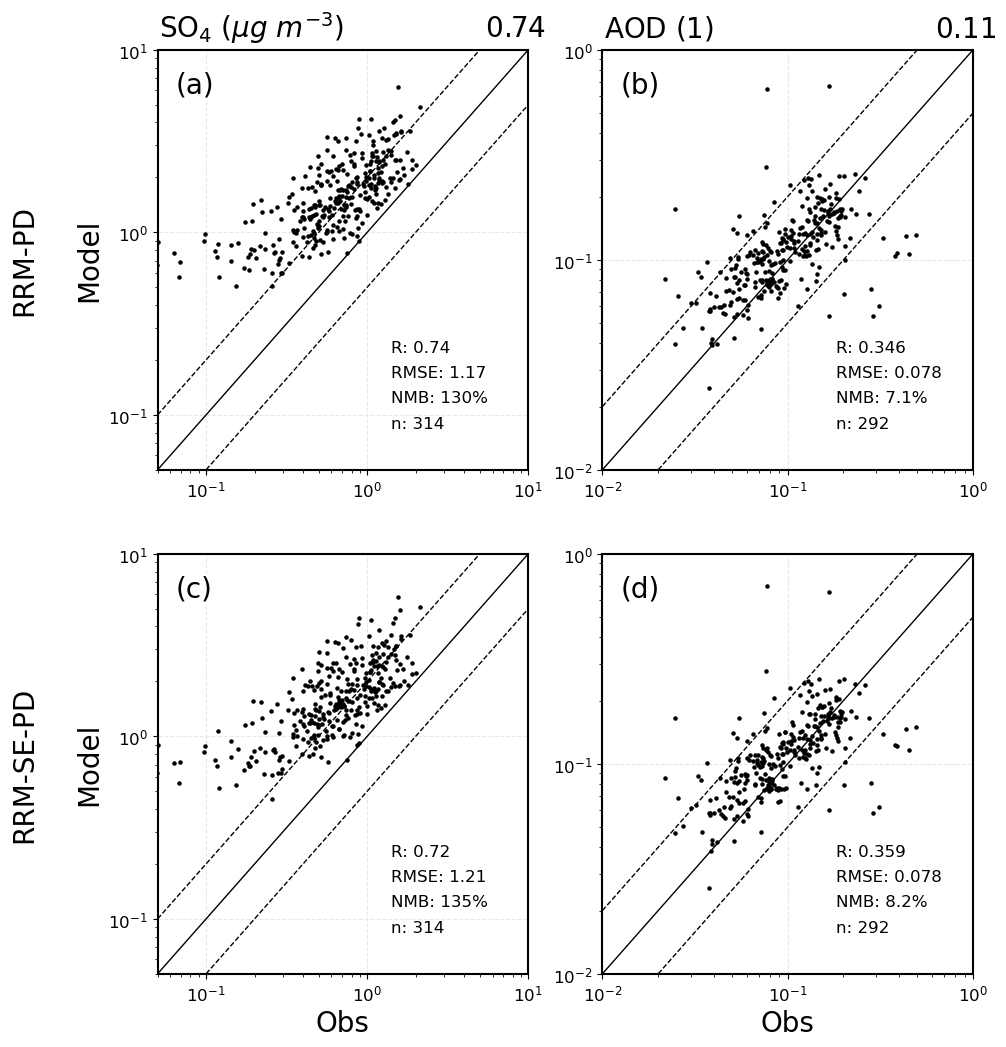

In [6]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
from manuscript_plot_functions import get_emisMasked, get_ElevEmisMasked, get_scatter_plot3
from manuscript_plot_functions import get_ts, get_vertint, get_var, get_scatter_plot2

lab=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
lab=['(a)','(b)','(c)','(d)']
varbs = ['so4_a1_SRF','SE_so4_a1_SRF','so4_a2_SRF','SE_so4_a2_SRF','so4','SE_so4']
df = pd.read_csv('/global/cfs/cdirs/e3sm/www/hass877/share/Data_manuscript/SO4_IMPROVE_dailydata.csv')
df[['so4_RRM','SE_so4_RRM']] = df[['so4_RRM','SE_so4_RRM']]*(96/115)
variable='SO$_4$'
df.index=pd.to_datetime(df['time'])
## Get rid of nans & -ve vals
df_nona = df[df['obs'].notna()]
df_nona = df_nona[df_nona['obs']>0]
obs='obs'
res='RRM'
## Masking data based on mean +/- 0.5*Standard deviation
df_nona=get_emisMasked(df_nona,res,stat='diff',factor=0.68)
## Estimating the monthly and annual averages from daily data
df_monthly = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1M').mean()
df_annual = df_nona.select_dtypes(include=[np.number]).groupby('ncols_'+res).resample('1Y').mean()
## Plotting
plt.figure(figsize=(22,12))
i=1
j=1
for v,treat,ylab,xlab in zip(varbs[-2:],['SO$_4$ ($\u03BCg\ m^{-3}$)                0.74',''],['RRM-PD\n\nModel','RRM-SE-PD\n\nModel'],['','Obs']):
    ax=plt.subplot(2,4,i)
    get_scatter_plot2(df_monthly,v,res,ax,treatment=treat,temp='monthly',size=5,cax=[5e-2,5e-2,1e1,1e1],vv=ylab,vx=xlab,typ=obs)
    ax.text(0.05,0.95,lab[j-1],size=20,transform=ax.transAxes,va='top',bbox={'facecolor':'white','pad':1,'edgecolor':'none'})
    i+=4
    j+=2
#########
## Mask data based on emissions
def get_emisMasked2(df,res,var,stat='diff',factor=1,pos=None,neg=None):
    print(stat)
    if pos==None:
        pos=df[var+'_emis_'+stat+'_'+res].mean()+factor*df[var+'_emis_'+stat+'_'+res].std()
    if neg==None:
        neg=df[var+'_emis_'+stat+'_'+res].mean()-factor*df[var+'_emis_'+stat+'_'+res].std()
    df=df[(df[var+'_emis_'+stat+'_'+res]<=neg) | (df[var+'_emis_'+stat+'_'+res]>=pos)] 
    print(pos,neg)
    return df

## Mask data based on emissions
def get_ElevEmisMasked2(df,res,var,stat='diff',factor=1,pos=None,neg=None):
    print(stat)
    if pos==None:
        pos=df[var+'_emis_elev_'+stat+'_'+res].mean()+factor*df[var+'_emis_elev_'+stat+'_'+res].std()
    if neg==None:
        neg=df[var+'_emis_elev_'+stat+'_'+res].mean()-factor*df[var+'_emis_elev_'+stat+'_'+res].std()
    print('Range: ',pos,neg)
    df=df[(df[var+'_emis_elev_'+stat+'_'+res]<=neg) | (df[var+'_emis_elev_'+stat+'_'+res]>=pos)] 
    return df

obs='AOD_500nm'
varbs = ['AODVIS','SE_AODVIS','angstrm','SE_angstrm','AODABS','AODBC','AODPOM','AODSO4']
df = pd.read_csv('/global/cfs/cdirs/e3sm/www/hass877/share/Data_manuscript/AERONET_modelAOD_ALL.csv')
df.index=pd.to_datetime(df['time'])
variable=varbs[0]
df.index=pd.to_datetime(df['time'])
## Get rid of nans & -ve vals
df_nona = df[df[obs].notna()]
df_nona = df_nona[df_nona[obs]>=0]
df_nona = df_nona[df_nona[obs]<=1]
res='RRM'
## Masking sites with high bc and pom emissions difference
df_nona1=get_emisMasked2(df_nona,res,'bc_a4',stat='diff',factor=0.68)
df_nona2=get_ElevEmisMasked2(df_nona,res,'bc_a4',stat='diff',factor=0.68)
df_nona3=get_emisMasked2(df_nona,res,'pom_a4',stat='diff',factor=0.68)
df_nona4=get_ElevEmisMasked2(df_nona,res,'pom_a4',stat='diff',factor=0.68)
df_nona=pd.concat([df_nona1,df_nona3,df_nona2,df_nona4])

df_monthly = df_nona.select_dtypes(include=[np.number]).groupby(res).resample('1M').mean()
df_annual = df_nona.select_dtypes(include=[np.number]).groupby(res).resample('1Y').mean()
## Plotting
i=2
j=2
for v,treat,ylab,xlab in zip(varbs[:2],['AOD ($1$)                         0.11',''],['',''],['','Obs']):
    ax=plt.subplot(2,4,i)
    get_scatter_plot3(df_monthly,v,res,ax,treatment=treat,temp='monthly',size=5,cax=[1e-2,1e-2,1e0,1e0],vv=ylab,vx=xlab,typ=obs)
    ax.text(0.05,0.95,lab[j-1],size=20,transform=ax.transAxes,va='top',bbox={'facecolor':'white','pad':1,'edgecolor':'none'})
    i+=4
    j+=2
    
# plt.savefig('fig15.png',format='png',dpi=300,bbox_inches='tight',pad_inches=0.1)
# plt.savefig('fig15.pdf',format='pdf',dpi=300,bbox_inches='tight',pad_inches=0.1)